## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
comb_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
comb_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
# Checking the number of mice.
mice_qty = comb_data["Mouse ID"].nunique()
mice_qty

249

In [94]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
comb_data_dup = comb_data.duplicated(subset=["Mouse ID", "Timepoint"])
#comb_data_dup = comb_data[comb_data.duplicated()]
#comb_data_dup #= comb_data_dup.loc[comb_data_dup[True]]
#comb_data_dup.unique()
comb_data[comb_data_dup]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [90]:
# Optional: Get all the data for the duplicate mouse ID. 
comb_data[comb_data['Mouse ID']=='g989']
#comb_data_dup = comb_data[comb_data.duplicated(subset=["Mouse ID", "Timepoint"])]
#comb_data_dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [98]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_comb_data = comb_data[comb_data["Mouse ID"] != "g989"]
clean_comb_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [99]:
# Checking the number of mice in the clean DataFrame.
clean_comb_data["Mouse ID"].nunique()

248

## Summary Statistics

In [116]:
import numpy as np
from scipy import stats
# clean_comb_data.groupby(["Drug Regimen"])[].mean()
# clean_comb_data.groupby(["Drug Regimen"])[].describe()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [127]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_gp_mean = clean_comb_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
drug_gp_mean = drug_gp_mean.rename("Mean")

drug_gp_median = clean_comb_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
drug_gp_median.rename("Median",inplace = True)

pd.merge(drug_gp_mean, drug_gp_median, on="Drug Regimen")

,Mean,Median
Drug Regimen,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285
Placebo,54.033581,52.288934
Propriva,52.320930,50.446266
Ramicane,40.216745,40.673236
Stelasyn,54.233149,52.431737


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_comb_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg([np.mean,np.median,np.var, np.std, stats.sem])

## Bar and Pie Charts

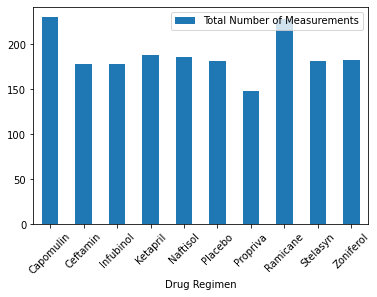

In [170]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

clean_comb_data_gp = clean_comb_data.groupby(["Drug Regimen"]).count()
drug_name_ls = clean_comb_data_gp.index.to_list()

x_axis = drug_name_ls
y_axis = clean_comb_data_gp["Mouse ID"]

drug_reg_df = pd.DataFrame({"Drug Regimen": x_axis,
                            "Total Number of Measurements": y_axis
                            })

ax = drug_reg_df.plot.bar(x="Drug Regimen", y="Total Number of Measurements", rot = 45)

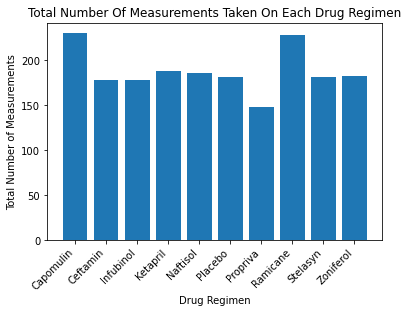

In [164]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

clean_comb_data_gp = clean_comb_data.groupby(["Drug Regimen"]).count()
drug_name_ls = clean_comb_data_gp.index.to_list()

x_axis = drug_name_ls
y_axis = clean_comb_data_gp["Mouse ID"]

plt.bar(x_axis, y_axis, align="center")
# Rotates X-Axis Ticks by 45-degrees and aligns end of x labels to center of the bars
plt.xticks(rotation = 45, horizontalalignment = "right")
plt.title("Total Number Of Measurements Taken On Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")

plt.show()

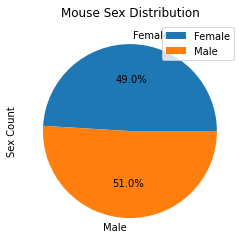

In [214]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
clean_comb_data_gp_sex = clean_comb_data.groupby(["Sex"]).count()["Mouse ID"]

sex = clean_comb_data_gp_sex.index.to_list()
sex_count = clean_comb_data_gp_sex.to_list()

sex_count_df = pd.DataFrame({"Sex Count": sex_count}
                           , index = sex)

plot = sex_count_df.plot.pie(y = "Sex Count", title = "Mouse Sex Distribution", autopct="%1.1f%%")

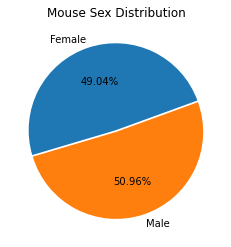

In [208]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

explode = []
for number in sex_count:
    explode.append(0.01)

plt.pie(sex_count, labels=sex, explode = explode, startangle = 20, autopct="%1.2f%%")
plt.title("Mouse Sex Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [260]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
clean_comb_data_gp_time = clean_comb_data.groupby(["Mouse ID"])[["Drug Regimen", "Timepoint"]].max()

drug_df = pd.DataFrame(clean_comb_data_gp_time)

drug_4_df = drug_df[drug_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
#drug_4_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_comb_data, drug_4_df, on=("Mouse ID", "Timepoint", "Drug Regimen"))
drug_4_tumor = merged_df[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
drug_4_tumor

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,45,22.050126
1,s185,Capomulin,45,23.343598
2,x401,Capomulin,45,28.484033
3,m601,Capomulin,45,28.430964
4,g791,Ramicane,45,29.128472
...,...,...,...,...
95,x822,Ceftamin,45,61.386660
96,y163,Infubinol,45,67.685569
97,y769,Ceftamin,45,68.594745
98,y865,Ceftamin,45,64.729837


In [298]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = drug_4_tumor["Drug Regimen"].unique()
#print(treatments)

# Create empty list to fill with tumor vol data (for plotting)
tumors_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_df = drug_4_tumor.loc[drug_4_tumor["Drug Regimen"] == treatment,:]
    
    # add subset
    tumors_vol.append(drug_df["Tumor Volume (mm3)"])
    
    # Determine outliers using upper and lower bounds
    quartiles = drug_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = round(lowerq - (1.5*iqr), 2)
    upper_bound = round(upperq + (1.5*iqr), 2)
    
    print(treatment)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(".....................................\n")   

Ramicane
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
.....................................

Capomulin
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.
.....................................

Infubinol
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.
.....................................

Ceftamin
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.
.....................................



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

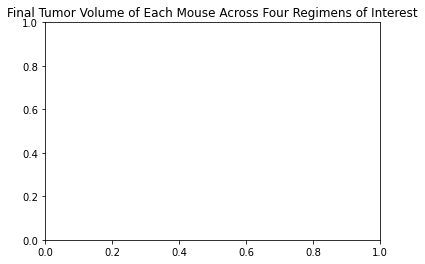

In [302]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#tumors_vol
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of Each Mouse Across Four Regimens of Interest')

#ax1.set_xticklabels(np.repeat(treatments, 2), rotation=45, fontsize=8) #https://matplotlib.org/3.1.1/gallery/statistics/boxplot_demo.html
ax1.set_xlabel(a.all(treatments)
ax1.set_ylabel('Final Tumor Volumes')
ax1.boxplot(tumors_vol)
plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
